<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
# To determine the number of rows and columns, I will check the shape of the DataFrame.
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
# I will use the dtypes function in Pandas to look at the data type of each column.
movies.dtypes
# When comparing the head to the data types, it appears all data types are correct.

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
# I will use the mean function in Pandas to calculate the mean for the 'duration' column.
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
# I will use the Pandas sort function to sort movies by duration. In order to maintain the new order, I will write over
# the existing movies DataFrame.
movies=movies.sort_values('duration')
print(movies)
# Based on the output below, the shortest movie is Freaks and the longest movie is Hamlet.

     star_rating                              title content_rating      genre  \
389          8.0                             Freaks        UNRATED      Drama   
338          8.0                Battleship Potemkin        UNRATED    History   
258          8.1        The Cabinet of Dr. Caligari        UNRATED      Crime   
293          8.1                          Duck Soup         PASSED     Comedy   
88           8.4                            The Kid      NOT RATED     Comedy   
..           ...                                ...            ...        ...   
445          7.9               The Ten Commandments       APPROVED  Adventure   
142          8.3  Lagaan: Once Upon a Time in India             PG  Adventure   
78           8.4        Once Upon a Time in America              R      Crime   
157          8.2                 Gone with the Wind              G      Drama   
476          7.8                             Hamlet          PG-13      Drama   

     duration              

#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([  6.,   3.,  16.,  28.,  60.,  80., 104.,  90., 107.,  95.,  95.,
         69.,  55.,  37.,  19.,  29.,  17.,  20.,   9.,  12.,   6.,   7.,
          4.,   3.,   2.,   1.,   2.,   1.,   0.,   2.]),
 array([ 64.        ,  69.93333333,  75.86666667,  81.8       ,
         87.73333333,  93.66666667,  99.6       , 105.53333333,
        111.46666667, 117.4       , 123.33333333, 129.26666667,
        135.2       , 141.13333333, 147.06666667, 153.        ,
        158.93333333, 164.86666667, 170.8       , 176.73333333,
        182.66666667, 188.6       , 194.53333333, 200.46666667,
        206.4       , 212.33333333, 218.26666667, 224.2       ,
        230.13333333, 236.06666667, 242.        ]),
 <BarContainer object of 30 artists>)

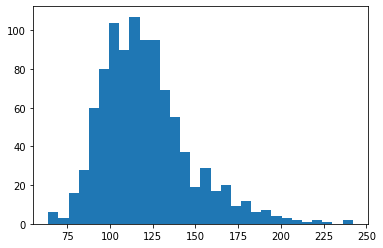

In [7]:
# Answer:
# I used the histogram function of MatPlotLib to create the histogram.
# Given the large size of the data set, I tested out 20 bins, then 30. The bins appeared to be of the same size with 30 bins,
# which was not the case with 20. I confirmed by taking the square root of the number of observations (979) as per the square 
# root method of bin sizing, which rounded to thirty.
plt.hist(movies['duration'],bins=30)

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x28152cac340>,
 'caps': [<matplotlib.lines.Line2D at 0x28152cac9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28152c9deb0>],
 'medians': [<matplotlib.lines.Line2D at 0x28152cbb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x28152cbb490>],
 'means': []}

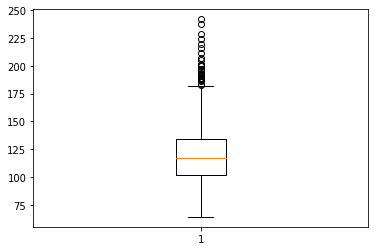

In [8]:
# Answer:
# I used the boxplot function of MatPlotLib to create the box plot.
plt.boxplot(movies['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
# I used value_counts in Pandas to identify the number of movies in each content rating category.
content_count=movies.content_rating.value_counts()
print(content_count)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, '# of Movies by Content Rating')

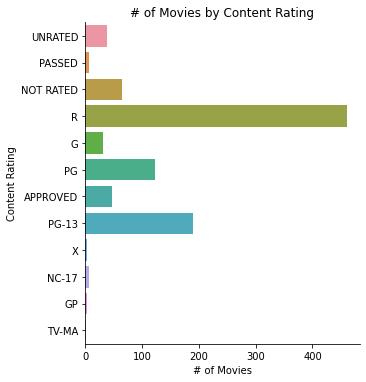

In [10]:
# Answer:
# I used Seaborn to create a barplot
import seaborn as sns

content_rating_viz=sns.catplot(y="content_rating", kind="count", data=movies)
content_rating_viz.set_axis_labels('# of Movies','Content Rating')
plt.title('# of Movies by Content Rating')


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED')

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['X','TV-MA'],'NC-17')

#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
# I created a Boolean variable for those null content ratings.
crmissing = pd.isnull(movies["content_rating"]) 
    
# I filtered to show only those movies missing content ratings.
movies[crmissing] 
# The three movies missing ratings are Butch Cassidy and the Sundance Kid, True Grit, and Where Eagles Dare.

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [15]:
# Based on the conversion above, I changed these values to "UNRATED."
movies['content_rating'].fillna('UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
# I used the split approach to categorize movies by duration, then took the average of each.
moviestwoplus = movies[movies['duration'] >= 120]
moviesundertwo = movies[movies['duration'] < 120]

print(moviestwoplus.mean())
print(moviesundertwo.mean())

star_rating      7.948899
duration       142.458150
dtype: float64
star_rating      7.838667
duration       102.405714
dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

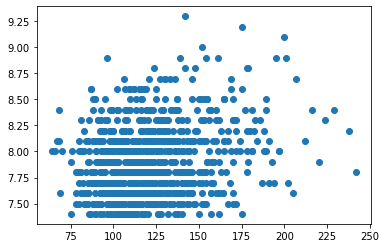

In [17]:
# Answer:
plt.scatter(movies['duration'],movies['star_rating'])
# There does not appear to be a relationship between duration and star rating based on the scatterplot.

In [18]:
# To confirm, I ran a correlation between the two variables. While there is a correlation, it can be considered low.
movies['star_rating'].corr(movies['duration'])


0.2271491834305919

#### Calculate the average duration for each genre.

In [19]:
# Answer:
# I used groupby to calculate the mean duration for each genre.
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

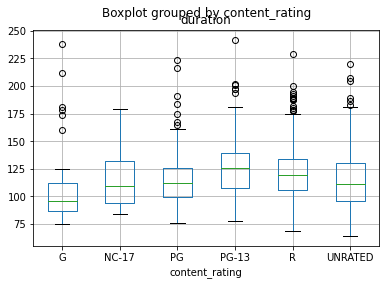

In [20]:
# Answer:
# I visualized the relationship with a boxplot of duration grouped by content rating.
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [41]:
# Answer:
# I used groupby in order to find the solution here. I was trying "max()" which wasn't working,
# so did some research and found "first()".
movies.sort_values('star_rating',ascending=False).groupby('genre')['title','star_rating'].first()

<ipython-input-41-f7ebd5a1eaa6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movies.sort_values('star_rating',ascending=False).groupby('genre')['title','star_rating'].first()


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [32]:
# Answer:
movies.loc[movies.title.duplicated(keep=False)]

# Based on the below, these are not actual duplicates--all are remakes/other movies with the same titles.


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [40]:
# Answer:
genres = movies['genre'].value_counts()[movies['genre'].value_counts() >= 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!